# Reading Data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import itertools
import matplotlib.pyplot as plt
import seaborn as sns 
# warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 


<center><h3><b>Business Problem Statement</b></h3></center>
<br> 
We are a data science consultant who is contracted by property management investors in New York City. Their company, supported by investors, is to buy residential real estate in NYC at the cheapest price possible, renovate, then resell within a year. The renovation analysis is outside the scope of this project, but they want a baseline model that can predict the price of residential real-estate in order to :
 
1)    Identify potential undervalued listed properties to buy<br>
2)    Predict market price when it’s time to sell in order to sell quickly while maximizing return on investment
 
Because the want to renovate and sell the properties quickly, they want less than 10 residential units, and properties less than 5 million each but are at least ten thousand.
 <br>
<center><h3><b>Initial  Feature Analysis:</b></h3></center>
<br>
 
**Borough** is the borough in which the unit is located: '1':'Manhattan', '2':'Bronx', '3': 'Brooklyn', '4':'Queens','5':'Staten Island'. Location is a key feature in real estate, and this is especially true in NYC. For the purposes of exploratory analysis, we have converted the numeric values into their proper names.  Below you will see a clear distinction in price by neighborhood, with Manhattan being much more expensive. For constructing the model we will likely one hot encode.
 
**Neighborhood** is the specific neighborhood within the borough. There is a strong relationship with neighborhood and sale price. Much like borough, because the neighborhoods and not explicitly ranked, a one hot coding strategy will likely be used
 
**Building Class Category** is an important feature as it separates between attached and unattached houses or elevator apartments
 
**Tax class a present** is the tax class and is heavily correlated with both sale price and tax class at time of sale. Tax class and number of units as correlated as the tax class depends on how may units. There is a big risk of data leakage with this feature. The models real world success would depend on accurately determining the tax class before selling or purchasing a property. Because of this, we may want to remove this feature.
 
Source 
https://blocksandlots.com/property-taxes-in-nyc-all-you-need-to-know/
 
 
**Block and Lot** The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL
 
Source 
https://blocksandlots.com/property-taxes-in-nyc-all-you-need-to-know/
 
 
**Building Class at present**
 
According to nyc.gov:
 
“The Building Classification is used to describe a property’s constructive use. The first position of the Building Class is a letter that is used to describe a general class of properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums). The second position, a number, adds more specific information about the property’s use or construction style (using our previous examples “A0” is a Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial condominium unit). The term Building Class used by the Department of Finance is interchangeable with the term Building Code used by the Department of Buildings.”
 
Because this feature has direct overlap with many other features, we will likely remove it.
 
Source:
https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf
 
**Address** Is the actual address. Because of the variance we will remove this feature. However, it could be potentially used to crosswalk longitude and latitude, but that would require an additional dataset.
 
**Zip Code** Zip codes are difficult to work with in machine learning problems because it’s an integer and a higher or lower zip code won’t necessarily mean it’s better or worse. If we are going to use it we will one hot encode
 
**Residential Units** are the number of residential units for sale. This is correlated with price as 8 units will likely cost more than 2 in a similar neighborhood. For exploratory analysis we examine the price per unit.
 
**Land Square Feet** is the land area of the property. This is a valuable feature for predicting price
 
**Gross Square Feet** According to nyc.gov: “The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property.”  This is also a valuable feature for predicting price. However, it’s important for compare between this and location as a smaller property in the center of Manhattan, may be more expensive than a much larger property in Staten Island.
 
**Year Built** is the year the structure was built. Many of the properties were built a long time ago, but it’s worth further testing this feature before elimination. 
Tax class at time of sale: See above for tax class. It will be difficult to accurately predict this and it has a very high risk of data leakage. This feature will almost certainly be removed.
 
**Sale Price** is our target variable. Due to the scope of the business problem we are limiting the dataset to 10,000 and 5,000,0000
 
**Sale Date** Is the date of the sale. We may want to look at the sale month to determine if we can purchase a property in a slower month for real estate i.e. the winter cheaply and resell in a hotter month like this the spring.


<center><h3><b>Machine Learning Model</b></h3></center>
 
Accurately predicting the sales price is a regression problem. Because of this we will be creating 3 regression models:
 
* Linear Regression
 
* Decision Tree
  
* Random Forrest Regressor
 
We will evaluate the model’s performance with root mean square error and mean absolute error.

In [2]:
# Reading csv
df = pd.read_csv("../data/nyc-rolling-sales.csv")


# Replacing missing values with NaN
df.replace(" -  ",np.nan, inplace = True)

# Dropping index and EASE-MENT
df.drop(['EASE-MENT',
         'Unnamed: 0',
         'APARTMENT NUMBER',
         'BUILDING CLASS AT TIME OF SALE'], axis=1, inplace=True)

df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,8000000,2016-11-17 00:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    84548 non-null  int64 
 1   NEIGHBORHOOD               84548 non-null  object
 2   BUILDING CLASS CATEGORY    84548 non-null  object
 3   TAX CLASS AT PRESENT       84548 non-null  object
 4   BLOCK                      84548 non-null  int64 
 5   LOT                        84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT  84548 non-null  object
 7   ADDRESS                    84548 non-null  object
 8   ZIP CODE                   84548 non-null  int64 
 9   RESIDENTIAL UNITS          84548 non-null  int64 
 10  COMMERCIAL UNITS           84548 non-null  int64 
 11  TOTAL UNITS                84548 non-null  int64 
 12  LAND SQUARE FEET           58296 non-null  object
 13  GROSS SQUARE FEET          56936 non-null  object
 14  YEAR B

In [4]:
### This is key as it shows many types of buildings. Related to number of units
### Lets focus on flipping residental units
df["BUILDING CLASS CATEGORY"].value_counts()

01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM

# Cleaning Data

In [6]:
floats = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']

for col in floats:
    df[col]=pd.to_numeric(df[col], errors='coerce')

In [7]:
df['BUILDING CLASS CATEGORY'].unique()

array(['07 RENTALS - WALKUP APARTMENTS             ',
       '08 RENTALS - ELEVATOR APARTMENTS           ',
       '09 COOPS - WALKUP APARTMENTS               ',
       '10 COOPS - ELEVATOR APARTMENTS             ',
       '11A CONDO-RENTALS                           ',
       '12 CONDOS - WALKUP APARTMENTS              ',
       '13 CONDOS - ELEVATOR APARTMENTS            ',
       '14 RENTALS - 4-10 UNIT                     ',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL          ',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ',
       '17 CONDO COOPS                             ',
       '22 STORE BUILDINGS                         ',
       '37 RELIGIOUS FACILITIES                    ',
       '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC  ',
       '46 CONDO STORE BUILDINGS                   ',
       '47 CONDO NON-BUSINESS STORAGE              ',
       '01 ONE FAMILY DWELLINGS                    ',
       '02 TWO FAMILY DWELLINGS                    ',
       '03 THREE FAMILY DWE

In [8]:
# Removing white spaces
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].str.lstrip()
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].str.rstrip()

# Categories we would like to focus on 
df1 = df.loc[df['BUILDING CLASS CATEGORY']=='01 ONE FAMILY DWELLINGS']
df2 = df.loc[df['BUILDING CLASS CATEGORY']=='02 TWO FAMILY DWELLINGS']
df3 = df.loc[df['BUILDING CLASS CATEGORY']=='13 CONDOS - ELEVATOR APARTMENTS']
df4 = df.loc[df['BUILDING CLASS CATEGORY']=='10 COOPS - ELEVATOR APARTMENTS']
df5 = df.loc[df['BUILDING CLASS CATEGORY']=='03 THREE FAMILY DWELLINGS']
df6 = df.loc[df['BUILDING CLASS CATEGORY']=='09 COOPS - WALKUP APARTMENTS']
df7 = df.loc[df['BUILDING CLASS CATEGORY']=='15 CONDOS - 2-10 UNIT RESIDENTIAL']
df8 = df.loc[df['BUILDING CLASS CATEGORY']=='07 RENTALS - WALKUP APARTMENTS']
df9 = df.loc[df['BUILDING CLASS CATEGORY']=='08 RENTALS - ELEVATOR APARTMENTS']
df10 = df.loc[df['BUILDING CLASS CATEGORY']=='06 TAX CLASS 1 - OTHER']
df11 = df.loc[df['BUILDING CLASS CATEGORY']=='41 TAX CLASS 4 - OTHER']
df12 = df.loc[df['BUILDING CLASS CATEGORY']=='04 TAX CLASS 1 CONDOS']

# Concat dataframes
applist = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
df = pd.concat(applist)

In [9]:
df = df[df['SALE PRICE'] > 10000]
df = df[df['SALE PRICE'] < 5000000]

In [10]:
df = df.dropna()

In [11]:
df = df[df['YEAR BUILT'] > 0]
df = df[df['GROSS SQUARE FEET'] > 0]

In [12]:
df['COMMERCIAL UNITS'].value_counts()

0     25216
1       687
2        37
4         7
3         4
5         3
8         3
6         2
22        1
Name: COMMERCIAL UNITS, dtype: int64

In [13]:
df['RESIDENTIAL UNITS'].value_counts()

1      12514
2       9711
3       2278
4        567
6        305
       ...  
387        1
109        1
462        1
70         1
369        1
Name: RESIDENTIAL UNITS, Length: 75, dtype: int64

In [14]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [15]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['YEAR SOLD'] = (df['SALE DATE']).dt.year
df['MONTH SOLD']= (df['SALE DATE']).dt.month
del(df["SALE DATE"])

In [16]:
# # Residential units in range between 1 and 9 inclusive
df = df[df['RESIDENTIAL UNITS'] < 10]
df = df[df['RESIDENTIAL UNITS'] != 0]

# No commercial units
df = df[df['COMMERCIAL UNITS'] == 0]

# Drop unnecessary columns
df.drop(labels = ["COMMERCIAL UNITS","TOTAL UNITS"], axis = 1, inplace = True)


# Remove duplicates
print(df.shape)
df.drop_duplicates(inplace = True)
df.shape





(24995, 17)


(24940, 17)

/var/folders/xr/qzyql91n75v3cj288_wp4m8r0000gn/T/ipykernel_18582/1163256121.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

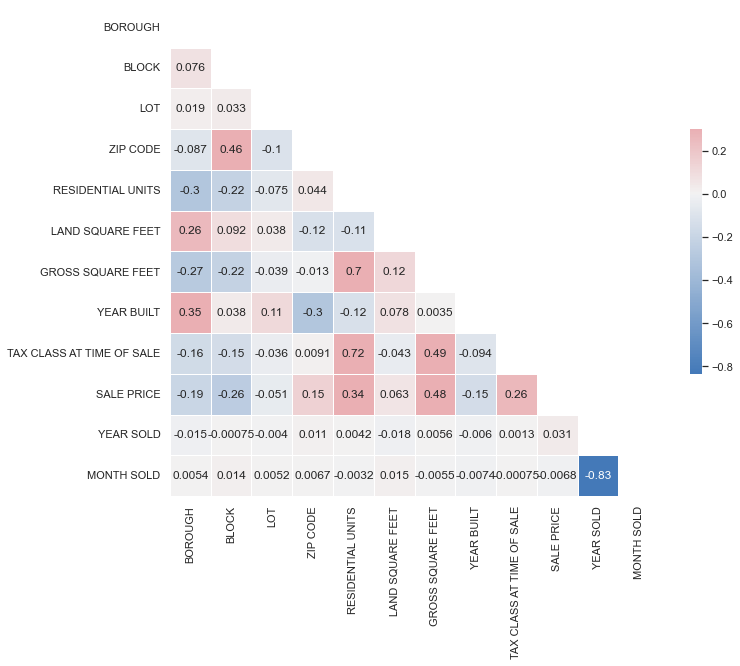

In [17]:
df_copy = df.copy()

# Set style
sns.set(style="white")

# pearson correlation
corr  = df_copy.corr(method = "pearson")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(249, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [18]:
#### Let's indicate the borough's for clear plotting

#'1':'Manhattan', '2':'Bronx', '3': 'Brooklyn', '4':'Queens','5':'Staten Island'
df['BOROUGH']= df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,YEAR SOLD,MONTH SOLD
4172,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,585,69,A5,2 GROVE COURT,10014,1,384.0,1152.0,1901,1,1375000.0,2016,10
4800,Manhattan,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,1942,58,A4,288 W. 137TH STREET,10030,1,1549.0,3036.0,1910,1,2300000.0,2016,11
4801,Manhattan,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,1960,41,A9,307 WEST 136 STREET,10030,1,1665.0,3200.0,1910,1,1510000.0,2017,1
4804,Manhattan,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,2024,50,A5,238 WEST 139TH STREET,10030,1,1699.0,3620.0,1910,1,3050000.0,2017,1
4805,Manhattan,HARLEM-CENTRAL,01 ONE FAMILY DWELLINGS,1,2041,126,A9,314 WEST 138 STREET,10030,1,1699.0,3536.0,1901,1,1595790.0,2017,8


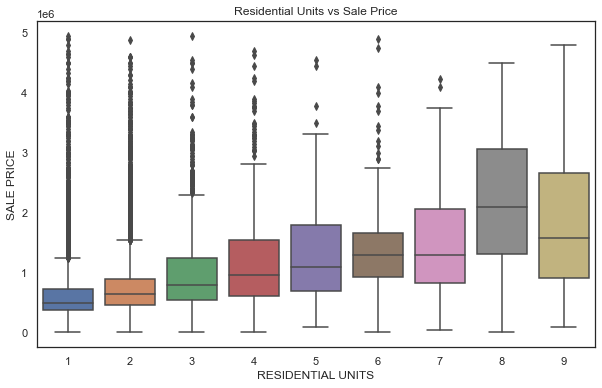

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df)
plt.title('Residential Units vs Sale Price')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24940 entries, 4172 to 20098
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BOROUGH                    24940 non-null  object 
 1   NEIGHBORHOOD               24940 non-null  object 
 2   BUILDING CLASS CATEGORY    24940 non-null  object 
 3   TAX CLASS AT PRESENT       24940 non-null  object 
 4   BLOCK                      24940 non-null  int64  
 5   LOT                        24940 non-null  int64  
 6   BUILDING CLASS AT PRESENT  24940 non-null  object 
 7   ADDRESS                    24940 non-null  object 
 8   ZIP CODE                   24940 non-null  int64  
 9   RESIDENTIAL UNITS          24940 non-null  int64  
 10  LAND SQUARE FEET           24940 non-null  float64
 11  GROSS SQUARE FEET          24940 non-null  float64
 12  YEAR BUILT                 24940 non-null  int64  
 13  TAX CLASS AT TIME OF SALE  24940 non-null  

<b>There is a relationship between the number of unit and the price. However, for residential units that are one, there are still many that cost more than multi unit properties. Examining them separately with borough or with building class category may be helpful


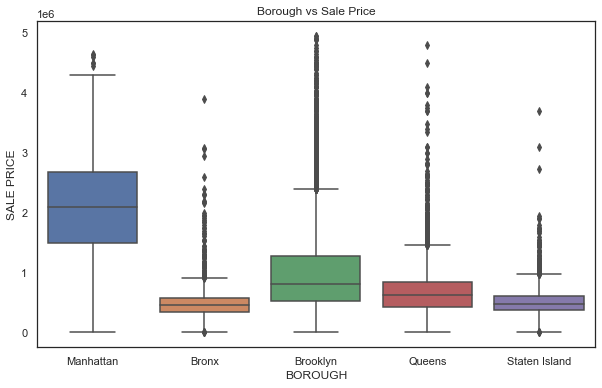

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
plt.title('Borough vs Sale Price')
plt.show()

Manhatten is priced higher than the others

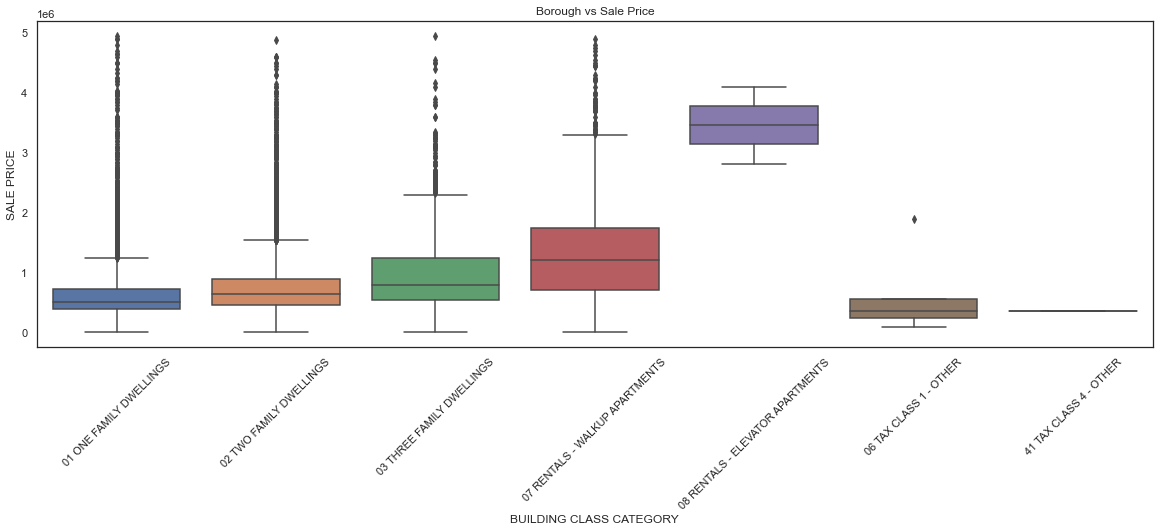

In [23]:
plt.figure(figsize=(20,6))
ax = sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Borough vs Sale Price')
plt.show()

In [24]:
### Rentals/Elevator apartments are high, but may have more units lets test:
rental_df = df.loc[df['BUILDING CLASS CATEGORY']=='08 RENTALS - ELEVATOR APARTMENTS']
len(rental_df)


2

In [25]:
rental_df['RESIDENTIAL UNITS'].value_counts()

7    1
9    1
Name: RESIDENTIAL UNITS, dtype: int64

There are only 4 08 RENTALS - ELEVATOR APARTMENTS in the dataset and they all have multiple units. They are an entire building or part of a
Building with many appartments and therefore more expensive.

In [27]:
onefamdf = df.loc[df['BUILDING CLASS CATEGORY']=='01 ONE FAMILY DWELLINGS']
onefamdf['RESIDENTIAL UNITS'].value_counts()

1    12263
2        8
Name: RESIDENTIAL UNITS, dtype: int64

it is mostly 1, the 8 that are two faimly units may be recent additions of attached aparments

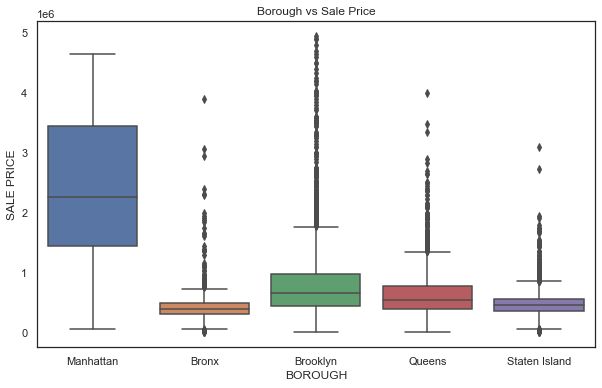

In [29]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=onefamdf)
plt.title('Borough vs Sale Price')
plt.show()

<b> Let’s examine the distribution of Residential units and building class category. We can find if there are other building classes that have one residential units and then divide the units so we can get the price per unit. This will allow us to see if there is a preference type of Building class category to see if we want to keep it as a feature. 

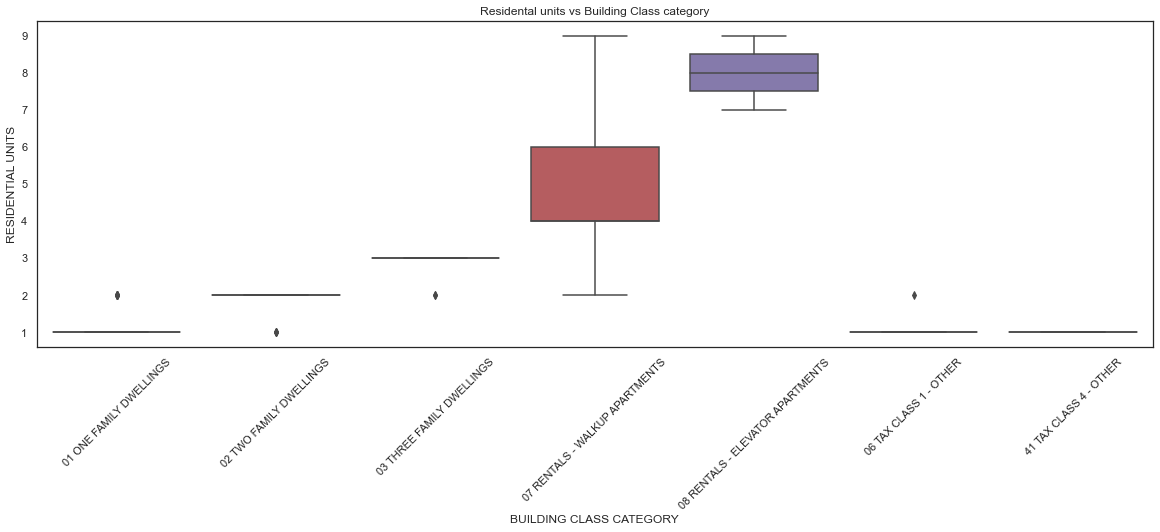

In [30]:
import seaborn as sns
plt.figure(figsize=(20,6))
ax = sns.boxplot(x='BUILDING CLASS CATEGORY', y='RESIDENTIAL UNITS', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Residental units vs Building Class category')
plt.show()

<b>Many of the building class categories are close have mostly one unit, with the two family units having two and three family units with three. The rentals and apartment building have a wider range that’s higher.


In [31]:
df['price per unit'] = df['SALE PRICE']/df['RESIDENTIAL UNITS']

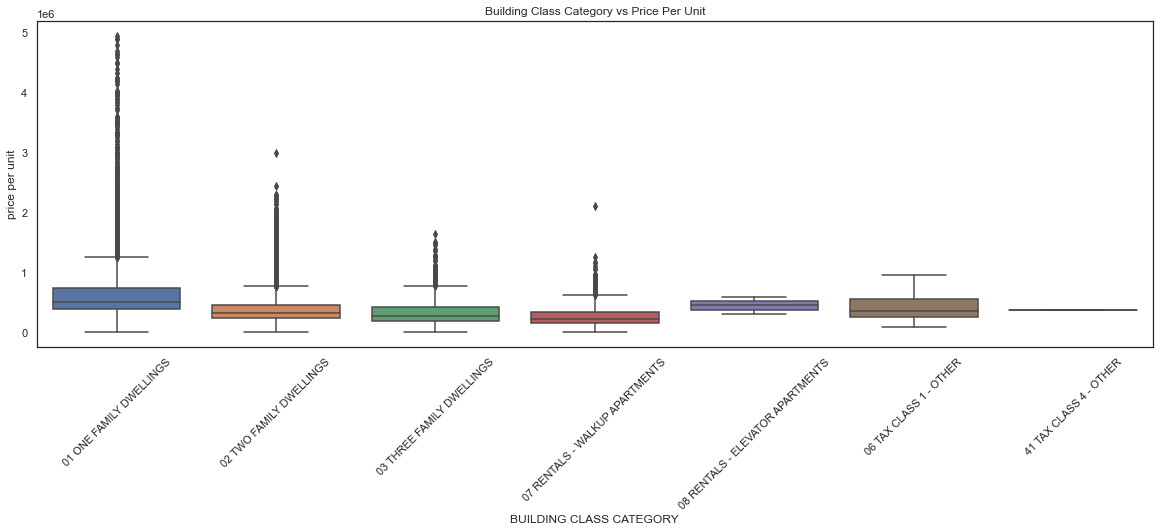

In [32]:
plt.figure(figsize=(20,6))
ax = sns.boxplot(x='BUILDING CLASS CATEGORY', y='price per unit', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Building Class Category vs Price Per Unit')
plt.show()

Across the city one family dwellings per unit are gennerally more expensive than two or three faimly dwllings.
However, many of the condos are on average more expensive than one family dwellings. This is not taking into account Borough
For example, a condo in Manhattan may cost more than a one family dwelling in Staten island.  

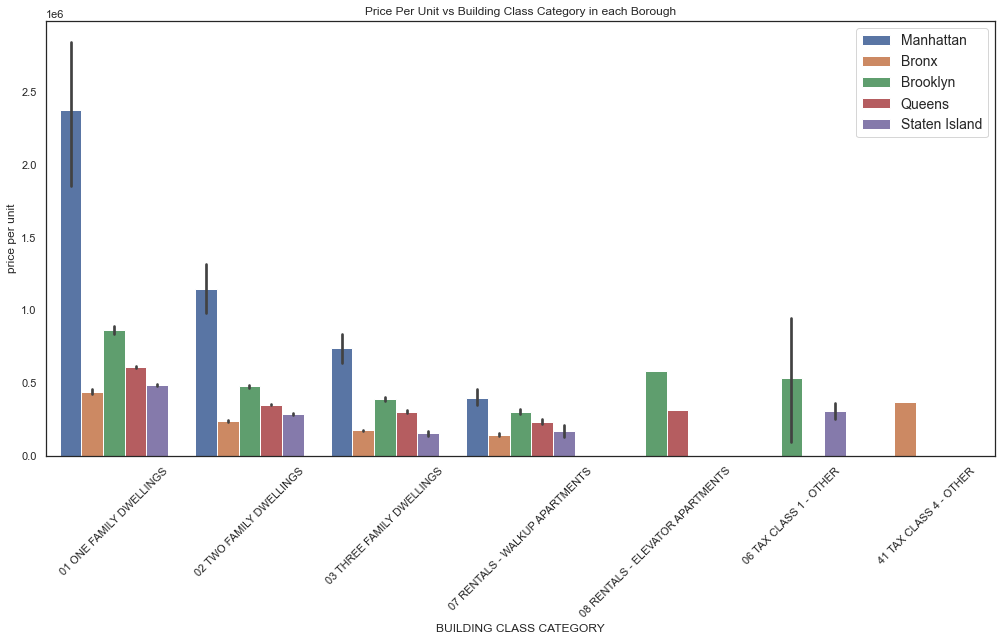

In [34]:
plt.figure(figsize=(17,8))
ax = sns.barplot(x='BUILDING CLASS CATEGORY', y='price per unit',hue='BOROUGH', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.legend(loc='upper right',fontsize=14)
plt.title('Price Per Unit vs Building Class Category in each Borough')
plt.show()

<b> It may also be fair to label just create another category of Manhattan = 1 and the rest 0. We can further use neighborhood to make this determination.

In [35]:
manhattendf = df.loc[df['BOROUGH']=='Manhattan']
manhattendfn = manhattendf.groupby('NEIGHBORHOOD')['price per unit'].median().reset_index()
manhattendfn.rename(columns = {'price per unit':'Median Price Per Unit'}, inplace = True)
manhattendfn = manhattendfn.sort_values(by='Median Price Per Unit', ascending=True)
manhattendfn = manhattendfn.dropna()

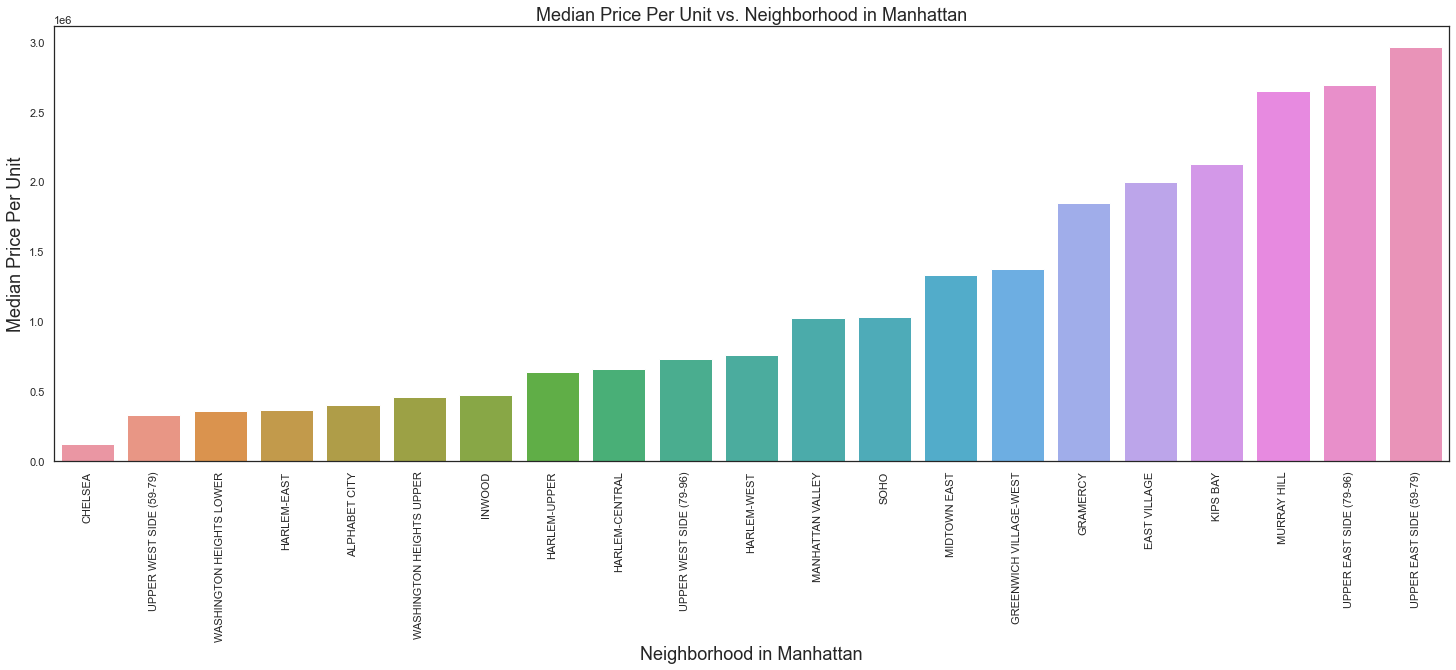

In [36]:
plt.figure(figsize=(25,8))
ax = sns.barplot(x='NEIGHBORHOOD', y='Median Price Per Unit', data =manhattendfn )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Median Price Per Unit vs. Neighborhood in Manhattan', fontsize = 18)
plt.xlabel("Neighborhood in Manhattan", fontsize = 18)
plt.ylabel("Median Price Per Unit", fontsize = 18)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.show()

<b> Wide range in median price by Neighborhood

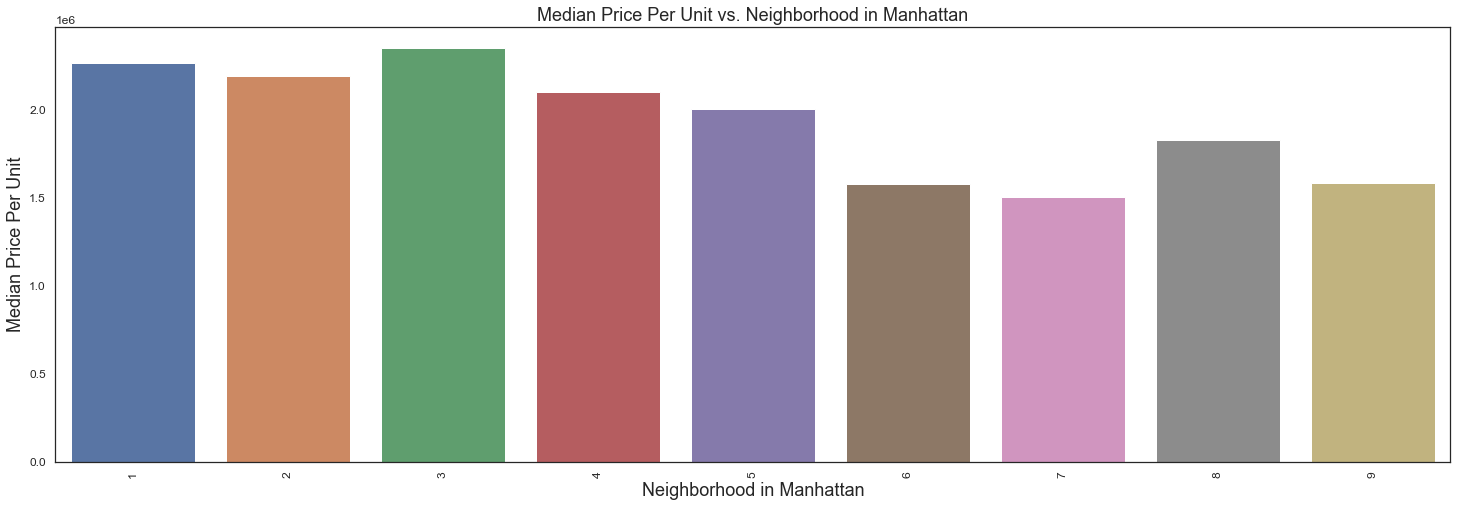

In [37]:
manhattendf
man_res_df = manhattendf.groupby('RESIDENTIAL UNITS')['SALE PRICE'].median().reset_index()
man_res_df.rename(columns = {'SALE PRICE':'MEDIAN SALE PRICE'}, inplace = True)
man_res_df = man_res_df.sort_values(by='MEDIAN SALE PRICE', ascending=False)
man_res_df = man_res_df.dropna()
plt.figure(figsize=(25,8))
ax = sns.barplot(x='RESIDENTIAL UNITS', y='MEDIAN SALE PRICE', data =man_res_df )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
# plt.legend(loc='upper right',fontsize=14)
plt.title('Median Price Per Unit vs. Neighborhood in Manhattan', fontsize = 18)
plt.xlabel("Neighborhood in Manhattan", fontsize = 18)
plt.ylabel("Median Price Per Unit", fontsize = 18)
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.show()

<h2> Looking at date

Text(0.5, 1.0, 'Sales per Borough from 2016-2017')

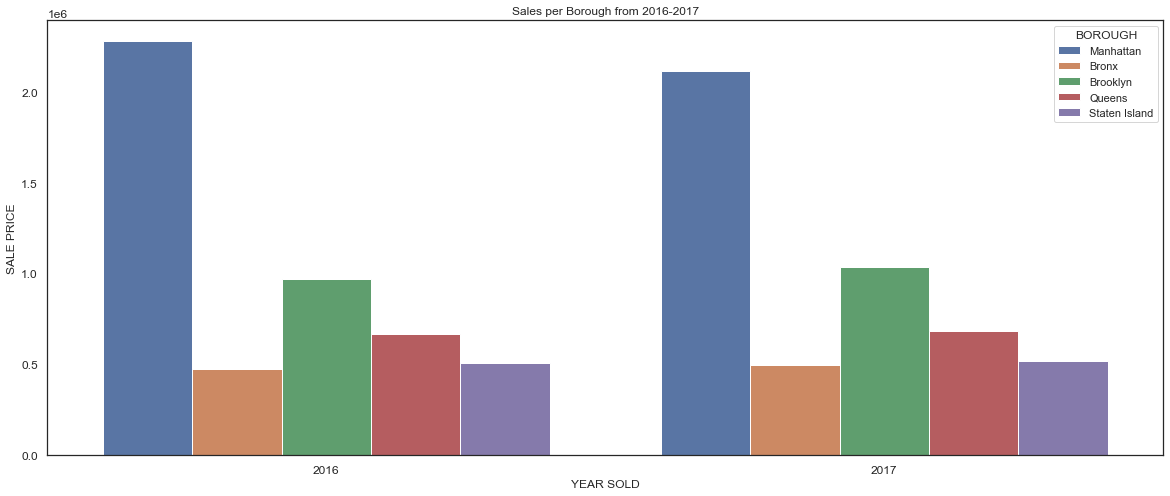

In [38]:
plt.subplots(figsize=(20,8))
sns.barplot(x='YEAR SOLD', y='SALE PRICE', hue='BOROUGH', data=df, ci=None)
plt.title('Sales per Borough from 2016-2017')

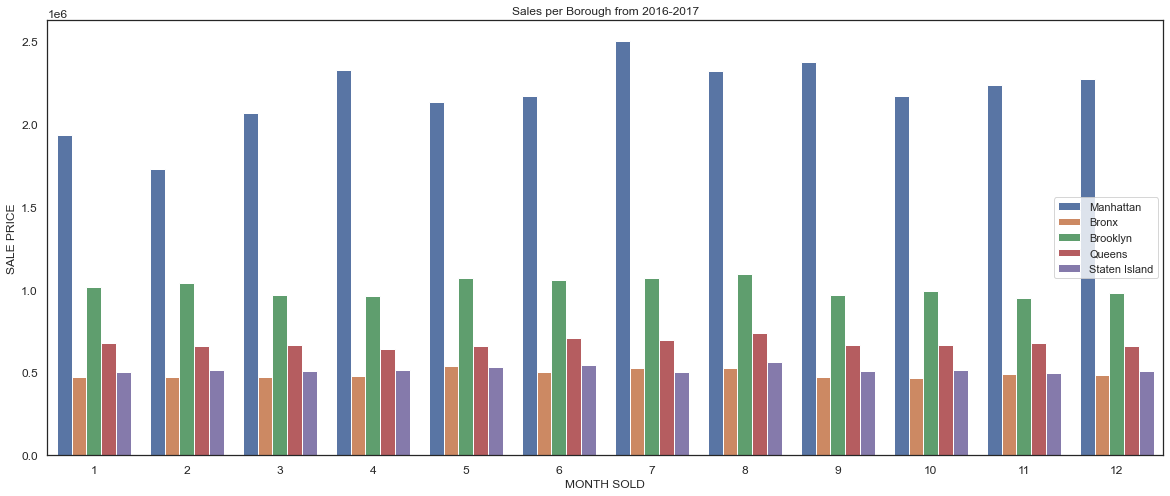

In [39]:
plt.figure(figsize=(20,8))
sns.barplot(x='MONTH SOLD', y='SALE PRICE', hue='BOROUGH', data=df, ci=None)
plt.title('Sales per Borough from 2016-2017')
plt.legend(loc='right')